In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('abs_data.csv',index_col=0)

In [14]:
df

,FrEM_1.5_0_0,FrEM_1.5_0_1,FrEM_1.5_0_2,FrEM_1.5_0_3,FrEM_1.5_0_4,FrEM_1.5_0_5,FrEM_1.5_0_6,FrEM_1.5_0_7,FrEM_1.5_0_8,FrEM_1.5_1_0,...,FrEM_1.5_8_0,FrEM_1.5_8_1,FrEM_1.5_8_2,FrEM_1.5_8_3,FrEM_1.5_8_4,FrEM_1.5_8_5,FrEM_1.5_8_6,FrEM_1.5_8_7,FrEM_1.5_8_8,COVID
0,100.994183,63.500354,23.764615,14.809006,10.132739,6.458623,6.079418,8.116356,6.566475,24.248562,...,2.626713,0.579372,0.493647,0.304215,0.524688,0.741711,0.647763,0.501151,0.800689,1.0
1,155.623148,56.797151,13.028535,6.626909,18.327383,21.185920,12.829356,8.488317,2.170785,28.747849,...,2.719659,0.752805,1.146061,0.545097,0.778240,0.335614,0.345323,0.875008,1.023703,1.0
2,129.221184,78.454162,35.385913,14.856545,22.996153,26.209789,3.273651,8.038485,13.874770,33.070410,...,2.618402,1.192939,1.087911,0.424599,0.430478,0.243887,1.101742,0.878708,0.708836,1.0
3,90.390971,52.613964,27.395924,19.762264,25.765934,19.968011,7.511855,17.745597,2.505243,34.382638,...,2.952575,1.119850,1.417656,1.717594,0.808168,0.905884,1.340841,0.749654,1.203081,1.0
4,20.972250,64.084754,9.752420,19.138170,7.501705,13.622549,5.201777,2.111775,3.481266,30.666826,...,2.827844,0.086999,0.472183,0.830620,0.773404,0.326004,0.659731,0.117143,0.404780,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,49.290555,52.447780,30.949830,22.272996,28.822254,36.855464,10.118797,16.890644,1.069317,26.021889,...,1.213497,1.520239,1.408453,2.653076,0.821519,0.340801,1.145084,0.962714,1.747128,1.0
371,7.895864,40.140272,41.581360,31.097774,35.716285,58.725989,4.130060,13.639239,7.002448,41.124935,...,4.125636,0.354485,0.130846,1.322603,1.304823,1.435656,0.698340,1.433633,1.348833,1.0
296,141.097152,67.394794,40.584523,13.660300,18.929907,24.108398,9.341448,2.551847,7.145349,45.700588,...,0.866579,0.580831,0.847183,0.559834,0.398378,0.199093,0.910787,0.342122,0.443316,0.0
338,75.061793,47.387411,7.835419,22.178775,10.514467,27.084513,15.362545,1.225671,4.086449,13.058083,...,3.137124,0.416624,0.804608,0.550893,0.825911,0.417157,0.861060,0.533441,0.400909,1.0


In [15]:
df.shape

(463, 82)

In [5]:
import seaborn as sns

<AxesSubplot: xlabel='COVID', ylabel='Count'>

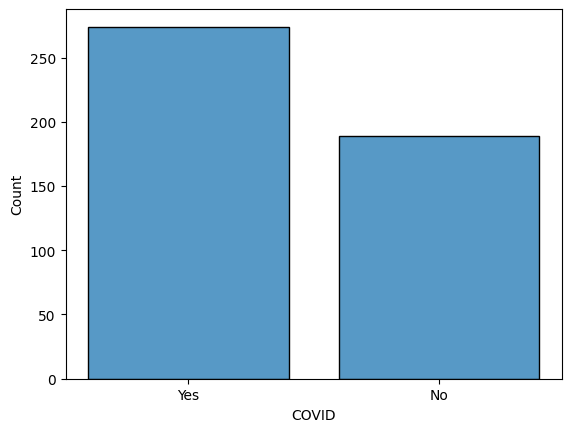

In [10]:
sns.histplot(x=df['COVID'].map({1.0:'Yes',0.0:'No'}),shrink=.8)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=41)

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)

print(classification_report(Y_test, y_pred))

print('-----------------------------------------------')

from sklearn.model_selection import cross_val_score

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(pipe, X, Y)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59        40
         1.0       0.69      0.75      0.72        53

    accuracy                           0.67        93
   macro avg       0.66      0.65      0.65        93
weighted avg       0.66      0.67      0.66        93

-----------------------------------------------
0.60 accuracy with a standard deviation of 0.06


In [ ]:
import random
import numpy as np

D = len(df.columns)-1
N = 100
T = 10000
F = 1  # mutation scaling factor

class Agent:

    def __init__(self) -> None:
        self.x = np.array(Agent.gen_rand_x(),dtype=np.float64)
        self.accuracy = 0
        self.N_sel=0

    def gen_rand_x() -> list[float]:
        x = []
        for col in df.columns[:-1]:
            lb = min(df[col])
            ub = max(df[col])
            x.append(lb+random.random()*(ub-lb))
        return x

    def fitness_func(self) -> float:
        def to_binary(self):
            bin = []
            for x_i in self.x:
                eq = 1/(1+np.exp(-x_i))
                bin.append(eq > 0.5)
            return bin

        bin = to_binary(self)

        N_sel = bin.count(True)
        self.N_sel = N_sel

        to_delete = [df.columns[i] for i in range(len(bin)) if bin[i] == False]

        df1 = df.drop(to_delete, axis='columns')

        X = df1[df1.columns[:-1]]
        Y = df1[df1.columns[-1]]

        X_train, X_test, Y_train, Y_test = train_test_split(
            X,
            Y,
            test_size=0.2,
            random_state=41
        )

        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_train, Y_train)
        y_pred = neigh.predict(X_test)

        error = np.sum(y_pred == Y_test)/len(y_pred)

        beta = random.random()

        self.accuracy = accuracy_score(Y_test, y_pred)

        return beta*error+(1-beta)*N_sel/D

    def Chain_Cyclone(self, t: float, i: int, x_best: np.array, agents: list['Agent']) -> None:
        r = np.array([random.random() for i in range(len(self.x))])
        if random.random() < 0.5:
            r1 = random.random()
            beta = 2*np.exp(r1*(T-t+1)/T)*np.sin(2*np.pi*r1)
            if (t/T < random.random()):
                # eq 13
                if (i == 0):
                    self.x = x_best+r*(x_best-self.x)+beta*(x_best-self.x)
                else:
                    self.x = x_best+r * \
                        (agents[i-1].x-self.x)+beta*(x_best-self.x)
            else:
                # eq 15
                x_rand = Agent.gen_rand_x()
                if (i == 0):
                    self.x = x_rand+r*(x_rand-self.x)+beta*(x_rand-self.x)
                else:
                    self.x = x_rand+r*(agents[i-1].x-self.x)+beta*(x_rand-self.x)
        else:
            # eq 11
            alpha = 2*np.sqrt(np.log(np.linalg.norm(r)))*r
            if (i == 0):
                self.x = self.x+r*(x_best-self.x)+alpha*(x_best-self.x)
            else:
                self.x = self.x+r*(agents[i-1].x-self.x)+alpha*(x_best-self.x)

    def Somersault(self, x_best: np.array):
        S = 2
        r2 = random.random()
        r3 = random.random()
        self.x = self.x + S*(r2*x_best-r3*self.x)

    def DE(self, i: int, agents: list['Agent']) -> None:
        x_r1 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r2 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r3 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x

        # probability already satisfied

        V = Agent()
        V.x = x_r1 + F*(x_r2 - x_r3)

        if (V.fitness_func() < self.fitness_func()):
            self.x = V.x


def calc_Pr(i: int, ffs: list[float]) -> float:
    sum = np.sum(ffs)
    return ffs[i]/sum


agents = [Agent() for i in range(N)]
t = 0
best_ind = 0
while (agents[best_ind].accuracy < 0.9):
    ffs = [agent.fitness_func() for agent in agents]

    best_ind = np.argmin(ffs)

    print(agents[best_ind].accuracy)

    for i in range(len(agents)):
        agents[i].Chain_Cyclone(t, i, agents[best_ind].x, agents)

    for i in range(len(agents)):
        Pr = calc_Pr(i, ffs)
        if Pr < 0.5:
            agents[i].Somersault(agents[best_ind].x)
        else:
            agents[i].DE(i, agents)

    t += 1

best_bin = agents[best_ind].to_binary()

to_delete = [df.columns[i] for i in range(len(best_bin)) if best_bin[i] == True]

print('Accuracy',agents[best_ind].accuracy,'N_sel',agents[best_ind].N_sel)

In [ ]:
df1 = df.drop(to_delete, axis='columns')

X = df1[df1.columns[:-1]]
Y = df1[df1.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=41)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))